In [1]:
import nsepy as nse
import talib as ta
import pandas as pd
import io
import requests
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [172]:
def rsi_20_80(x):
    if(x<20):
        return "BUY"
    elif(x>80):
        return "SELL"
    else:
        return "DO NOTHING"

In [2]:
url = 'https://www.nseindia.com/content/indices/ind_nifty50list.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
company_symbols=list(df['Symbol'].values)
company_symbols

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'INFRATEL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DRREDDY',
 'EICHERMOT',
 'GAIL',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'IBULHSGFIN',
 'IOC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'VEDL',
 'WIPRO',
 'YESBANK',
 'ZEEL']

In [5]:
data={}
for s in company_symbols:
    print(s)
    data[s]=nse.get_history(s,start=date(2018,1,1),end=date(2019,5,20))

ADANIPORTS
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BPCL
BHARTIARTL
INFRATEL
BRITANNIA
CIPLA
COALINDIA
DRREDDY
EICHERMOT
GAIL
GRASIM
HCLTECH
HDFCBANK
HEROMOTOCO
HINDALCO
HINDUNILVR
HDFC
ICICIBANK
ITC
IBULHSGFIN
IOC
INDUSINDBK
INFY
JSWSTEEL
KOTAKBANK
LT
M&M
MARUTI
NTPC
ONGC
POWERGRID
RELIANCE
SBIN
SUNPHARMA
TCS
TATAMOTORS
TATASTEEL
TECHM
TITAN
UPL
ULTRACEMCO
VEDL
WIPRO
YESBANK
ZEEL


In [173]:
for key in company_symbols:
    data[key]['ADX']=ta.ADX(data[key].High,data[key].Low,data[key].Close,timeperiod=14)
    data[key]['RSI_9']=ta.RSI(data[key].Close,timeperiod=9)
    data[key]['RSI_14']=ta.RSI(data[key].Close,timeperiod=14)
    data[key]['STOCH_skowk'],data[key]['STOCH_slowd'] = ta.STOCH(data[key].High,data[key].Low,data[key].Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    data[key]['WILLR']=ta.WILLR(data[key].High,data[key].Low,data[key].Close, timeperiod=14)
    data[key]['MA_20']=ta.MA(data[key].Close, timeperiod=20, matype=0)
    data[key]['MA_50']=ta.MA(data[key].Close, timeperiod=50, matype=0)
    data[key]['MA_100']=ta.MA(data[key].Close, timeperiod=100, matype=0)
    data[key]['EMA_8']=ta.EMA(data[key].Close, timeperiod=8)
    data[key]['ADX+DMI']=data[key]['ADX']+ta.DX(data[key].High,data[key].Low,data[key].Close,timeperiod=14)
    data[key]['ADX-DMI']=data[key]['ADX']-ta.DX(data[key].High,data[key].Low,data[key].Close,timeperiod=14)
    data[key]['SMA_20']=ta.SMA(data[key].Close, timeperiod=20)
    data[key]['SMA_50']=ta.SMA(data[key].Close, timeperiod=50)
    data[key]['SMA20_cross_SMA50']=data_new[key]['SMA_20']>data_new[key]['SMA_50']
    data[key]['SMA20_cross_SMA50']=data[key]['SMA20_cross_SMA50'].apply(lambda x:'BUY' if x==True else "NO SIGNAL")
    data[key]['RSI_9(20_80)']=data[key]['RSI_9'].apply(lambda x: rsi_20_80(x))
    data[key]['RSI_14(20_80)']=data[key]['RSI_14'].apply(lambda x: rsi_20_80(x))   

In [174]:
data_new=data

In [175]:
for key in company_symbols:
    data_new[key].dropna(inplace=True)

In [187]:
company_symbols

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'INFRATEL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DRREDDY',
 'EICHERMOT',
 'GAIL',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'IBULHSGFIN',
 'IOC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'VEDL',
 'WIPRO',
 'YESBANK',
 'ZEEL']

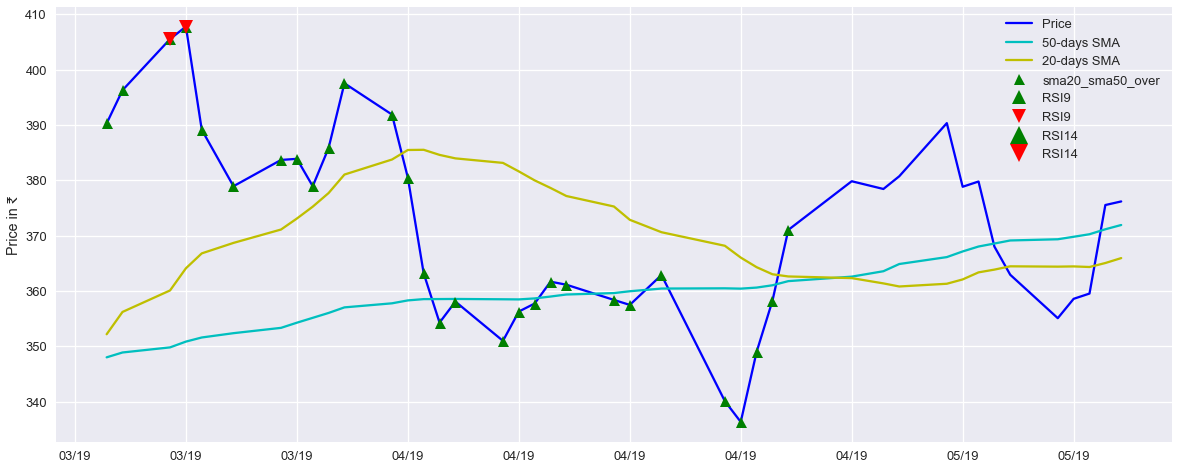

In [188]:
## SMA-20 and SMA-50 Crossover
company='BPCL'
start_date = data_new[company].index.min()
end_date = data_new[company].index.max()

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(data_new[company].loc[start_date:end_date, :].index, data_new[company].loc[start_date:end_date,'Close'],color='b',label='Price',)
ax.plot(data_new[company]['SMA_50'].index,data_new[company]['SMA_50'].values,color='c',label = '50-days SMA')
ax.plot(data_new[company]['SMA_20'].index,data_new[company]['SMA_20'].values,color='y',label = '20-days SMA')
## Recommend Based on SMA20 and SMA50 Crossover
buy = data_new[company].loc[data_new[company]['SMA20_cross_SMA50']=='BUY']
plt.plot(buy.index, data[company].loc[buy.index]['Close'], '^', markersize=11, color='g',label='sma20_sma50_over')

## Recommend Based on RSI_9 (BUY <20 and SELL >80)
buy1=data_new[company].loc[data_new[company]['RSI_9(20_80)']=='BUY']
sell1=data_new[company].loc[data_new[company]['RSI_9(20_80)']=='SELL']
plt.plot(buy1.index, data[company].loc[buy1.index]['Close'], '^', markersize=14, color='g',label='RSI9')
plt.plot(sell1.index, data[company].loc[sell1.index]['Close'], 'v', markersize=14, color='r',label='RSI9')

## Recommend Based on RSI_14 (BUY <20 and SELL >80)
buy2=data_new[company].loc[data_new[company]['RSI_14(20_80)']=='BUY']
sell2=data_new[company].loc[data_new[company]['RSI_14(20_80)']=='SELL']
plt.plot(buy2.index, data[company].loc[buy2.index]['Close'], '^', markersize=18, color='g',label='RSI14')
plt.plot(sell2.index, data[company].loc[sell2.index]['Close'], 'v', markersize=18, color='r',label='RSI14')

ax.plot()
ax.legend(loc='best')
ax.set_ylabel('Price in ₹')
ax.xaxis.set_major_formatter(my_year_month_fmt)